In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as st
from scipy import stats

In [2]:
test = pd.read_csv('data/test.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
train = pd.read_csv('data/train.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.describe()
train.shape
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

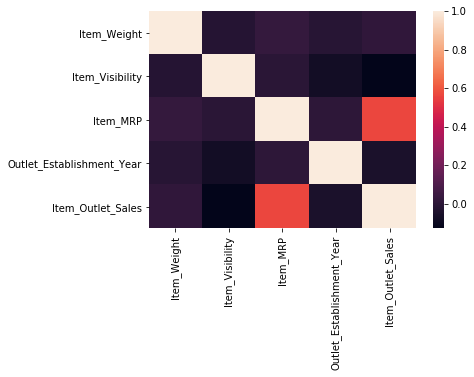

In [5]:
# first task

#lets check correlation between features and target 
sns.heatmap(train.corr())
# item_MRP have good correlation with sale(target)

In [6]:
# now explore each and every columns
columns = train.columns
# print(columns)
# ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
#        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
#        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
#        'Outlet_Type', 'Item_Outlet_Sales']
# column 1 
train['Item_Identifier'].value_counts() # should be catagorical, so we dont have correlation of this column
# column 2 (Item_Weight), should be drop because, it correlation with sale is 0
# column 3,
train.Item_Fat_Content.value_counts() #should be catagorical, so we dont have correlation of this column

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
# column 3 need to be in uniform way so,
train.Item_Fat_Content = train.Item_Fat_Content.replace('LF','Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.replace('low fat','Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.replace('reg','Regular')
train.Item_Fat_Content.value_counts()

# column 4 (Item_Visibility) need to drop, because its correlation with sale is 0
# column 5
train.Item_Type.value_counts()
# column 6

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [8]:
## For further data processing we need to convert column type into their correct type


train.Item_Identifier = train.Item_Identifier.astype('category')
# train.Item_Weight and Item_Visibility  droped
train.Item_Fat_Content = train.Item_Fat_Content.astype('category')
train.Item_Type = train.Item_Type.astype('category')
train.Item_MRP = train.Item_MRP.astype('float64')
train.Outlet_Identifier = train.Outlet_Identifier.astype('category') 
train.Outlet_Establishment_Year = train.Outlet_Establishment_Year.astype('int64')
train.Outlet_Size = train.Outlet_Size.astype('category')
train.Outlet_Location_Type = train.Outlet_Location_Type.astype('category')
train.Outlet_Type = train.Outlet_Type.astype('category')
train.Item_Outlet_Sales = train.Item_Outlet_Sales.astype('float64')



### Now ITEM_MRP column. Correlation strength of this column with target column is very high so we need can exploit this column for further infomation about target column


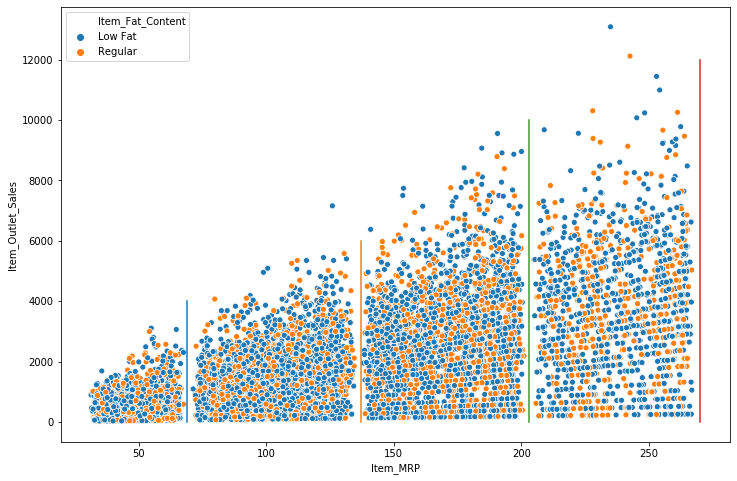

In [9]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',data = train)
plt.plot([69,69],[0,4000])
plt.plot([137,137],[0,6000])
plt.plot([203,203],[0,10000])
plt.plot([270,270],[0,12000])


In [10]:
# pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')[source]
# Bin values into discrete intervals.
train.Item_MRP = pd.cut(train.Item_MRP,bins = [25,69,137,203,270], labels = ['a','b','c','d'], right=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,a,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,b,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,b,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,c,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [11]:
# we will drop two columns that is item weight and item visibility
train.drop(['Item_Weight','Item_Visibility'],axis=1,inplace=True)

In [12]:
train.drop('Item_Identifier',axis=1,inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Fat_Content             8523 non-null category
Item_Type                    8523 non-null category
Item_MRP                     8523 non-null category
Outlet_Identifier            8523 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Type                  8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(7), float64(1), int64(1)
memory usage: 193.3 KB


In [14]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
# train.Outlet_Size=train.apply(func,axis=1)
# train

In [16]:
train.isnull().sum()

Item_Fat_Content                0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
train = train.fillna({
      'Outlet_Size':st.mode(train.Outlet_Size)   
})

In [18]:
train.isnull().sum()

Item_Fat_Content             0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
train

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,c,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,Regular,Baking Goods,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,Regular,Snack Foods,a,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,Low Fat,Snack Foods,b,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,Regular,Frozen Foods,b,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,Regular,Frozen Foods,c,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


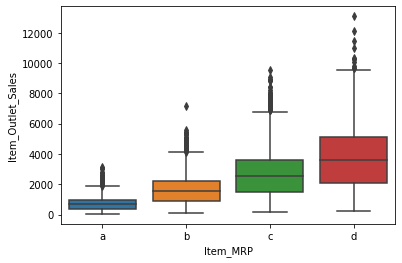

In [20]:
## Now lets checkout OUTLIERS 
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales', data=train)

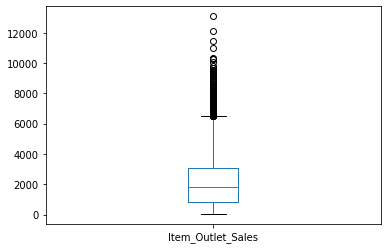

In [21]:
train.Item_Outlet_Sales.plot(kind='box')

In [22]:
# removing outliers 
# converting into z score
z = np.abs(stats.zscore(train.Item_Outlet_Sales))
# threshould 3, 
arr = np.where(z>4)
arr

(array([ 333,  456,  991,  997, 1009, 1450, 2109, 3098, 4289, 4346, 4349,
        4888, 4961, 5223, 5500, 6409, 6541, 6606, 7188, 7191, 7752, 7930,
        8201], dtype=int64),)

In [23]:
for i in arr:
    train = train.drop(index=i)

In [24]:
train.shape

(8500, 9)

In [34]:
train = train.reset_index(drop=True)
train

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,c,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,Regular,Baking Goods,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,Regular,Snack Foods,a,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,Low Fat,Snack Foods,b,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,Regular,Frozen Foods,b,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,Regular,Frozen Foods,c,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


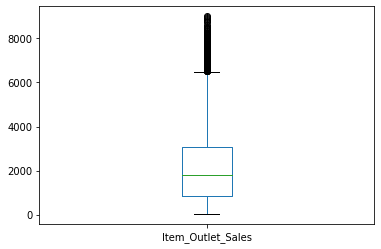

In [26]:
train.Item_Outlet_Sales.plot.box()

In [35]:
# now data [rocessing have been completed] 
# pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
# Convert categorical variable into dummy/indicator variables.
train.Outlet_Establishment_Year=train.Outlet_Establishment_Year.astype('category')
data_label=train.Item_Outlet_Sales
train_dummy=pd.get_dummies(train.iloc[:,0:8])

In [36]:
train_dummy['Item_Outlet_Sales'] = data_label

In [37]:
train_dummy

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,994.7052
5,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,556.6088
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,343.5528
7,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,4022.7636
8,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1076.5986
9,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,4710.5350


In [32]:
#now apply ML
